In [1]:
import math
import matplotlib.pyplot as plt
import numpy as np

# 4.2 Geometric Transformations

In this exercise, you will create matrices and apply linear geometric transformations in vectors and points on the homogeneous and Euclidean coordinate systems. We cover the following topics:

* Rotations and translations using homogeneous coordinates.
* Bases and transforming points between them.


We use the following helper functions for making the visualisation easier. Feel free to study the code:

In [2]:
def config_plot(title, data, data_type):
    rows, cols = data.shape
    
    plt.title(title)
    plt.grid(b=True, which="major")
    plt.legend([f'{data_type}{i+1}' for i in range(cols)])
    plt.axis('scaled')
    plt.plot(0, 0, "ok")

    plt.xlabel("X-Axis")
    plt.ylabel("Y-Axis")
    
    max_values = 1.3 * np.max(abs(data.T), axis = 0)
    plt.xlim([-max_values[0], max_values[0]])
    plt.ylim([-max_values[1], max_values[1]])
    
    plt.show()

def show_vectors(vectors, title="Vectors", origin=(0, 0)):
    rows, cols = vectors.shape

    for i in range(0, cols):
        xs = [origin[0], vectors[0, i]]
        ys = [origin[1], vectors[1, i]]
        plt.plot(xs, ys, "-", linewidth=2)
    
    config_plot(title, vectors, 'v')

def show_points(points, title="Points"):
    rows, cols = points.shape

    for i in range(0, cols):
        xs = points[0, i]
        ys = points[1, i]
        plt.plot(xs, ys, "o", linewidth=2)
    
    config_plot(title, points, 'p')

The rotation matrix ($R$) in two dimensions is given by:
$$R = \left[
	\begin{array}{r r}
		\cos(\theta) & -\sin(\theta)\\
		\sin(\theta) & \cos(\theta)
	\end{array}
\right],$$
where $\theta$ is the rotation angle around the origin $(0, 0)$.

### Task (A)
1. **Create rotation matrices:** Implement the function `get_2d_rotation_matrix()` below which, given an input angle `theta` (in radians) returns the rotation matrix `R`

In [3]:
def get_2d_rotation_matrix(theta):
    cos = math.cos(theta)
    sin = math.sin(theta)
    return np.array([[cos, -sin],
                     [sin, cos] ])



2. **Test the function:** Thest your function by multiplying the rotation matrix with the vector $[0, 1]^T$ for the following values of $\theta$: $0, \pi/2, \pi, 1.5\pi, 2\pi$. Print the results.

In [4]:
angles = [math.pi/2, math.pi, 3*math.pi/2, 2/math.pi]
vector = np.array([[0], [1]])

# Write solution here
first = get_2d_rotation_matrix(0) @ vector
second = get_2d_rotation_matrix(math.pi/2) @ vector
third = np.dot(get_2d_rotation_matrix(math.pi), vector )
forth = np.dot(get_2d_rotation_matrix(1.5 * math.pi), vector )
fifth = get_2d_rotation_matrix(2 * math.pi) @ vector

print(first, second, third, forth, fifth, sep='\n')

[[0.]
 [1.]]
[[-1.000000e+00]
 [ 6.123234e-17]]
[[-1.2246468e-16]
 [-1.0000000e+00]]
[[ 1.0000000e+00]
 [-1.8369702e-16]]
[[2.4492936e-16]
 [1.0000000e+00]]


3. **Rotate multiple vectors:** Rotate the vectors in `V1` by using matrix multiplication. Show both the original and transformed vectors using the `show_vectors` function.

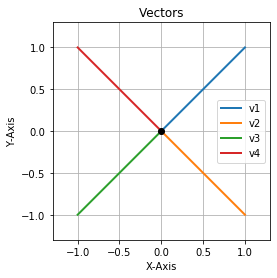

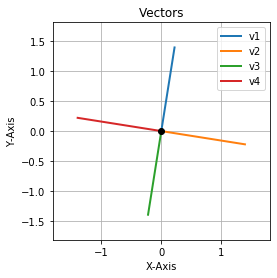

In [5]:
R = get_2d_rotation_matrix(math.pi/5)
V1 = np.array([[ 1,  1, -1 ,-1 ],
               [ 1, -1, -1,  1 ]], dtype=np.float64)

# Write solution here
show_vectors(V1)
show_vectors(R @ V1)

plt.show()

### *Extra* task
Translate the points in `p1` manually, by adding the translation $(-2, -1)$ to them. *Hint: Use broadcasting for the translation.*

In [6]:
p1 = np.array([[ 1, -1, 2, -2 ],
               [ 0, -1, 2, -1 ]], dtype=np.float64)
t = np.array([[-2], [-1]], dtype=np.float64)

# Write solution here
b = np.broadcast(p1, t)
out = np.empty(b.shape)
out.flat = [u+v for (u,v) in b]

pt = p1 + t
print(pt, out, sep='\n')

plt.show()

[[-1. -3.  0. -4.]
 [-1. -2.  1. -2.]]
[[-1. -3.  0. -4.]
 [-1. -2.  1. -2.]]


# 4.2.1 Homogeneous coordinates
In this exercise, you will implement rotations and translations using affine transformations.

An general affine transformation matrix for rotation and translation in 2d is defined as:
$$
T=\begin{bmatrix}\cos\theta&-\sin\theta & x_t\\\sin\theta& \cos\theta & y_t\\ 0&0&1\end{bmatrix}
$$

The transformation is then applied using the following calcuation
$$
\begin{bmatrix}x'\\ y'\\1\end{bmatrix} = T\begin{bmatrix}x\\ y\\1\end{bmatrix}.
$$

Affine transformations necessitate the use of homogeneous coordinates to be used with generic matrix multiplication methods. We therefore define the functions `to_homogeneous` and `to_euclidean` for easy conversion to and from homogeneous coordinates.

### Task(B)
1. Study the functions `to_homogeneous` and `to_euclidean` below. You will use them in many exercises to come.


 `to_homogeneous` : $ \begin{bmatrix}x\\ y \end{bmatrix} => \begin{bmatrix}x\\ y\\1\end{bmatrix} $

 `to_euclidean` : $  \begin{bmatrix}x\\ y \\1 \end{bmatrix} => \begin{bmatrix}x/1 \\ y/1 \end{bmatrix} $

In [7]:
def to_homogeneous(points):
    return np.vstack((points, np.ones( (1, points.shape[1]) ) ))

def to_euclidean(points):
    return points[:2] / points[2]

2. Implement the function `get_2d_rt_matrix`. It should return an affine transformation matrix given a rotation `theta` and translation tuple `t`.

In [8]:
def get_2d_rt_matrix(theta, t):
    return np.array([ [np.cos(theta), - np.sin(theta), t[0]],
                      [np.sin(theta),   np.cos(theta), t[1]],
                      [0,                      0         ,   1 ]      
    ])


3. **Transform points:** Transform the points in `p1` using `get_2d_rt_matrix`. Remember to convert the points to homogeneous coordinates. Experiment with different values of `theta` and `t`. In what order are the translation and rotation performed? Use `show_points` to show both the original and transformed points.

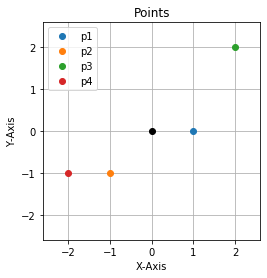

In [9]:
p1 = np.array([[ 1, -1, 2, -2 ],
               [ 0, -1, 2, -1 ]], dtype=np.float64)

# Write solution here
aff = get_2d_rt_matrix(0, (0,0)) # dont rotate theta = 0 I2 /  dont translate (0,0)
d = aff @ to_homogeneous(p1)
show_points(d)
plt.show()

4. **Combine multiple transformations:** Do a translation followed by a rotation by creating two separate transformation matrices and combining them using the equation $T_{final} = T_{last}T_{first}$. Transform the points in `p1` using the new matrix. Show the points.

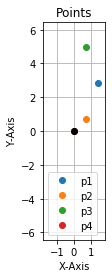

In [10]:
# Write solution here
tra = get_2d_rt_matrix(0, (2,1))
ro  = get_2d_rt_matrix(math.pi / 4, (0,0) )
Tf  = ro @ tra
res = Tf @ to_homogeneous(p1)
show_points(res)

plt.show()

# 4.2.2 Change of basis
In this exercise, you will apply a change of basis in homogeneous coordinate systems.

<img src="images/coordinateSystems.png" width="300px"></img>

The image above shows two coordinate systems: 
* $A$ which is defined by the unit vectors $\binom{0}{1}, \binom{1}{0}$.
* $B$ which is translated by $(7, 5)$ and rotated $50^\circ$ with respect to $A$.

In the following, you will transform points from $A$ to $B$ and back using the change of basis formula. The matrix representing the change of basis transformation is defined as $T^A_B=V_B^{-1}V_A$, where $V_B, V_A$ are the basis vectors of $A$ and $B$ respectively. Since $A=I$ in our case, $T^A_B=V_B^{-1}$. $V_B$ is defined by the affine transformation matrix that performs the translation and rotation mentioned above.

### Task (C)
1. **Create change of basis transformation:** 
Create an affine matrix `TAB` which maps a point from coordinate system $A$ to $B$ using the definitions above.

In [11]:
t = (7, 5)
theta = (50 * math.pi) / 180.

# Vb = np.array([ [0, 7],
#                 [5, 0]
            
#               ])
# Va = np.array([ [0, 1],
#                 [1, 0]
            
#               ])

# TAB2 = np.linalg.inv(Vb) @ Va

TAB = np.linalg.inv(get_2d_rt_matrix(theta, t))
# Write solution here

3. **Transform vectors:** Map the vectors defined by `vA` in coordinate system $A$ to coordinate system $B$ using the same method as the last exercise. Save the points as `vB` and plot them. Is the result what you expected? It might help to imagine the plots laid over the original plot above.

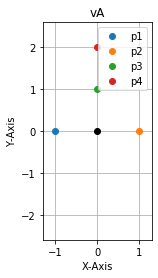

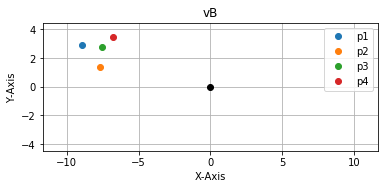

In [12]:
vA = np.array([[ -1, 1, 0, 0 ],
               [  0, 0, 1, 2 ]], dtype=np.float64)

# Write solution here
vB = TAB @ to_homogeneous(vA)
# vBB = TAB2 @ vA
show_points(vA,'vA')

show_points(vB,'vB')
# show_points(vBB, 'vBB')

plt.show()

4. **Inverse mapping:** Create the affine matrix `TBA` which maps a point from coordinate system $B$ to $A$ using the definitions above. Use it to transform the points `vB` back to $A$ - save the result in `vA2`. *Hint: You may create `TBA` either from scratch or from `TAB`.*

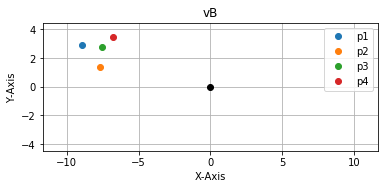

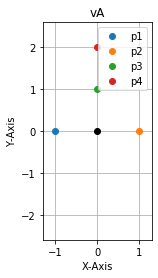

In [13]:
# Write solution here
TBA = np.linalg.inv(TAB)

show_points(vB, 'vB')
show_points(TBA @ vB, 'vA')

plt.show()